### Hotel booking demand

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns

from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder

In [34]:
df = pd.read_csv("./data/hotel_bookings.csv")

### Summary of dataset

* fraction of missing data,
* correlations,
* types of columns,
* distribution of features,
* alerts about data quality.

Please see `report_hotel_booking.html` file.

In [3]:
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_file(output_file="report_hotel_booking.html")

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [35]:
df = df.drop("country", axis=1)

In [36]:
feature_type = df.dtypes
object_features = [i for i in feature_type.index if feature_type[i] == 'object']

In [38]:
for feat in object_features:
    le = LabelEncoder()
    df[feat] = le.fit_transform(df[feat])        

In [39]:
X = df.drop('adr', axis=1)
y = df['adr']

Text(0.5, 1.0, 'Distribution of feature `adr`.')

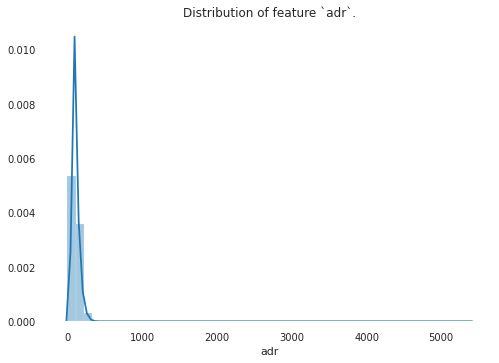

In [62]:
sns.distplot(y, hist=True, kde=True).set_title("Distribution of feature `adr`.")

### Base model

I would like to check the performance of model with defaults hyperparameters.



#### XGBoost

In [53]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [42]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [55]:
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

print("R2 score \ntrain: {}, \ntest: {}.".format(r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)))
print("MSE \ntrain: {}, \ntest: {}.".format(mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test)))
print("MAE \ntrain: {}, \ntest: {}.".format(mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_test, y_pred_test)))

R2 score 
train: 0.9187319075001693, 
test: 0.8727312137567466.
MSE 
train: 213.54666175137908, 
test: 296.8320317514934.
MAE 
train: 8.990609825677165, 
test: 9.846738072241543.


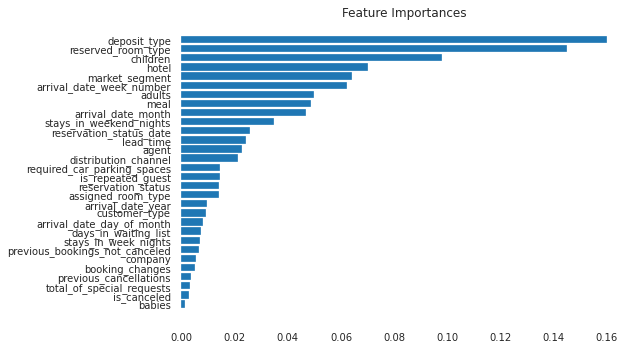

In [63]:
features = X_train.columns
importances = xgb.feature_importances_
indices_imp = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices_imp)), importances[indices_imp])
plt.yticks(range(len(indices_imp)), [features[i] for i in indices_imp])
plt.show()

**Comment:** Adding feature engineering and hyperparameter tuning will improve our model. I would like to try `NNI` package for hyperparameter tuning. It has many hyperparameter optimization algorithms and nice GUI with summary of your experiments.  